## Example 2 (Mediator Analysis): 

Here, we examine the effect of Sea Surface Temperature in the tropical Pacific (ENSO) on the position of the North Pacific jet stream (JET) and thence on winter precipitation (Dec-Jan-Feb) in California (CaliP). We assume here that JET fully mediates the effect of ENSO, and proceed to test that assumption.

<img src="../images/ex2.png" width="300" height="400">


### References / Notes

1. The link between ENSO and California precipitation is described in https://iopscience.iop.org/article/10.1088/1748-9326/11/5/054021/ampdf
2. California region is defined as described in https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1002/2015GL064424
3. JET in this example is defined as 24-hour differences of Mean Sea Level Pressure.


### Imports

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import iris
import iris.quickplot as qplt

import statsmodels.api as sm
from scipy import signal

### Step 1) Load the Data

In [6]:
jet = iris.load_cube('../sample_data/cali_jet_mean.nc')
calip = iris.load_cube('../sample_data/cali_precip_mean.nc', 'Monthly Mean of Precipitation Rate')
enso = iris.load_cube('../sample_data/enso_djf.nc', 'enso')

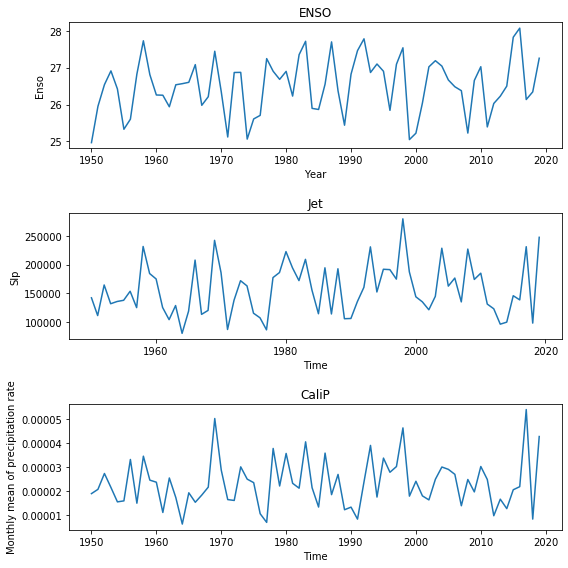

In [8]:
# PLOT raw data
fig = plt.figure(figsize=(8, 8))

plt.subplot(311)
qplt.plot(enso)
plt.title('ENSO')

plt.subplot(312)
qplt.plot(jet)
plt.title('Jet')

plt.subplot(313)
qplt.plot(calip)
plt.title('CaliP')
plt.tight_layout()



### Step 2) Data analysis

#### Standardize the data (zero mean, unit variance)

In [12]:
ENSO = (enso - np.mean(enso.data))/np.std(enso.data)
JET = (jet - np.mean(jet.data))/np.std(jet.data)
CALIP = (calip - np.mean(calip.data))/np.std(calip.data)

#### Detrend

In [14]:
ENSO = signal.detrend(ENSO.data)
JET = signal.detrend(JET.data)
CALIP = signal.detrend(CALIP.data)

#### Regression analysis

In [15]:
# Determine the causal effect from ENSO --> Jet
Y = JET
X =  ENSO

model = sm.OLS(Y,X)
results = model.fit()

print("effect of ENSO on Jet  =", round(results.params[0],2))

effect of ENSO on Jet  = 0.27


In [16]:
# Determine the causal effect from ENSO --> CaliP
Y = CALIP
X =  ENSO

model = sm.OLS(Y,X)
results = model.fit()
print("unadj. effect of ENSO on CaliP  =", round(results.params[0],2))

unadj. effect of ENSO on CaliP  = 0.23


In [17]:
# Determine the causal effect from JET --> CaliP
Y = CALIP
X =  JET

model = sm.OLS(Y,X)
results = model.fit()

print("effect of Jet on CaliP =", round(results.params[0],2))

effect of Jet on CaliP = 0.81


In [19]:
# Modified effect if both jet and ENSO are included

Y = CALIP
X = np.stack([ENSO, JET]).T

model = sm.OLS(Y,X)
results = model.fit()


print("effect of ENSO on CaliP=", round(results.params[0],2))

print("effect of Jet on CaliP =", round(results.params[1],2))

effect of ENSO on CaliP= 0.01
effect of Jet on CaliP = 0.81


#### Conclusions

When only considering ENSO and CaliP in the analysis we see a moderate effect of ENSO on CaliP of 0.27.
Once we 'block' the pathway via JET, i.e. by conditioning on it in the regression, the effect is reduced to being negligible (0.01) whilst the effect of JET on CaliP remains strong. Thus the effect of ENSO is in fact completely mediated via JET.
